In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 0. Simulate dataset

In [98]:
# np.random.seed(42)

# samples = 1000
# features = 2

# X = np.random.rand(samples, features)
# X = np.c_[np.ones(len(X)), X]

# # all calculations with 1-dim shape and redo y to 2-dim ...
# epsilon = np.random.randn(samples) # -> shape(1000,)
# y = 3 * X[:,1] + 5 * X[:,2] + 3 + epsilon # X[:,1].shape (1000,) even though X.shape är (1000,3)
# y = y.reshape(samples,1) # y.shape (1000,) -> (1000, 1)

# print(epsilon.shape)
# X[:3], X.shape, y[:3], y.shape


# #-----------------------
# alt to calculate y by dot product
# betas = np.array([3, 3, 5])
# y = np.dot(X, betas) + epsilon


(1000,)


(array([[1.        , 0.37454012, 0.95071431],
        [1.        , 0.73199394, 0.59865848],
        [1.        , 0.15601864, 0.15599452]]),
 (1000, 3),
 array([[7.9992093 ],
        [7.36239389],
        [4.02154963]]),
 (1000, 1))

In [110]:
# .... or a better solution to redo everthing to the shape we want so 2-dim in this case
np.random.seed(42)

samples = 1000
features = 2

X = np.random.rand(samples, features)
X = np.c_[np.ones(len(X)), X]
epsilon = np.random.randn(samples).reshape(len(X),1) # intinally is epsilon.shape(1000,) -> epsilon.shape (1000,1)
y = 3 * X[:,1].reshape(len(X), 1) + 5 * X[:,2].reshape(len(X), 1) + 3 + epsilon


print(epsilon.shape)
X[:3], X.shape, y[:3], y.shape

(1000, 1)


(array([[1.        , 0.37454012, 0.95071431],
        [1.        , 0.73199394, 0.59865848],
        [1.        , 0.15601864, 0.15599452]]),
 (1000, 3),
 array([[7.9992093 ],
        [7.36239389],
        [4.02154963]]),
 (1000, 1))

### 1. Gradient descent - learning rate

#### a)

In [99]:
# create gradient descent function updating theta epochs number of times

def batch_gradient_descent(X, y, learning_rate, epochs):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1) # generate initial random theta with # rows dimension matching # columns in X (X.shape[1])
                                            # could generate theta with linspace

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
    return theta.reshape(-1)


In [100]:
# testing functioin to generate one theta after 500 epochs to see what it converges to
theta = batch_gradient_descent(X, y, learning_rate = .1, epochs = 500)
theta

array([3.12412199, 2.95142955, 4.82898238])

In [101]:
# create array of all thetar returend while looping over epochs in epoch_list
#?????????? varför blir thetas fel, dvs varför får en array av redan konvergerade värden?)

learning_rate = 0.1
epochs = 500
step = 5

epoch_list = range(1, epochs, step)
thetas = np.array([batch_gradient_descent(X, y, learning_rate = learning_rate, epochs = epochs) for epoch in epoch_list])

print(f'{thetas[:5]}, {thetas.shape}')

[[3.12434015 2.95088446 4.82910329]
 [3.12173102 2.95342558 4.83150387]
 [3.12157394 2.95325909 4.83195733]
 [3.12151228 2.9534736  4.83186472]
 [3.12111856 2.95384225 4.83224127]], (100, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

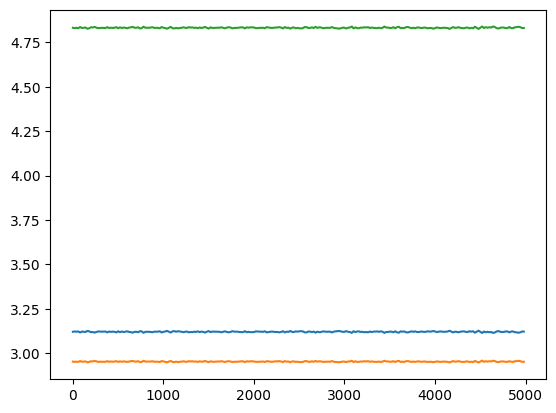

In [115]:
# plot thetas as function of epochs
# TODO gör denna plott snyggare med labels etc fix, ax = plt.plot

plt.plot(epoch_list, thetas)
plt.show

### b), c)

In [103]:
# repeat a) but with different value for learning_rate, epochs and step_size

learning_rate = 0.01
epochs = 5000
step = 20

epoch_list = range(1, epochs, step)
thetas = np.array([batch_gradient_descent(X, y, learning_rate = learning_rate, epochs = epochs) for epoch in epoch_list])

print(f'{thetas[:5]}, {thetas.shape}')

[[3.12143682 2.95344085 4.83203688]
 [3.1231695  2.95216316 4.83004639]
 [3.12187312 2.95295924 4.83169025]
 [3.12312429 2.95217884 4.83011541]
 [3.11742866 2.95666383 4.83638291]], (250, 3)


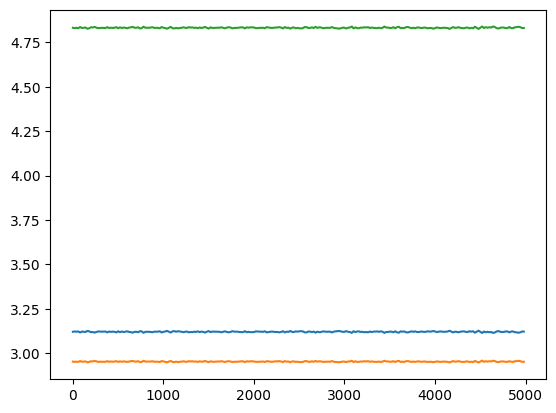

In [104]:
plt.plot(epoch_list, thetas)

---
### 2. Stochastic gradient descent - learning rate

---
### 3. Mini Batch Gradient Descent